In [1]:
%matplotlib inline

import numpy as np
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

C:\Anaconda3\envs\finance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Rest of the code

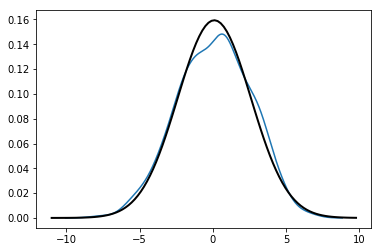

In [2]:
# Generate some data for this demonstration.
data = norm.rvs(0.1, 2.5, size=1000)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

rets=data

kde = sm.nonparametric.KDEUnivariate(rets)
kde.fit()
ret_value = kde.support
pdf = kde.density
prob = pdf*(ret_value[-1]-ret_value[0])/(len(pdf)-1)
prob[prob < 0] = 0

plt.plot(ret_value, pdf)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [3]:
N_days = 30
sample = np.random.choice(ret_value, p=prob, size=1000)

for k in range(N_days):
    sample += np.random.choice(ret_value, p=prob, size=1000)

(array([ 0.00335192,  0.00167596,  0.        ,  0.01005576,  0.02011152,
         0.02346343,  0.03687111,  0.05698263,  0.07541818,  0.10726142,
         0.11396525,  0.14748445,  0.12402101,  0.13240081,  0.18435556,
         0.12234505,  0.13575273,  0.0871499 ,  0.1122893 ,  0.08212202,
         0.04525091,  0.03351919,  0.00670384,  0.00670384,  0.00670384]),
 array([-8.06826011, -7.47158703, -6.87491395, -6.27824086, -5.68156778,
        -5.0848947 , -4.48822161, -3.89154853, -3.29487545, -2.69820236,
        -2.10152928, -1.5048562 , -0.90818311, -0.31151003,  0.28516305,
         0.88183614,  1.47850922,  2.0751823 ,  2.67185539,  3.26852847,
         3.86520155,  4.46187464,  5.05854772,  5.6552208 ,  6.25189389,
         6.84856697]),
 <a list of 25 Patch objects>)

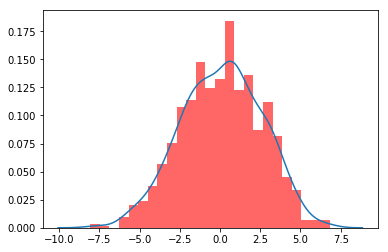

In [4]:
# Plot the histogram.
plt.plot(ret_value, pdf)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.hist(data, bins=25, normed=True, alpha=0.6, color='r')

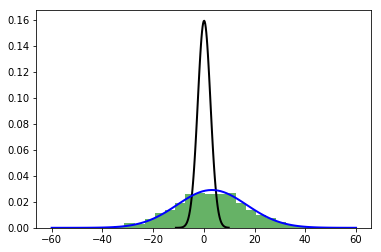

In [5]:
X_months = np.linspace(-60,60,100)
P_month = norm.pdf(X_months, mu*N_days, std*np.sqrt(N_days))
plt.hist(sample, bins=25, normed=True, alpha=0.6, color='g')
plt.plot(x, p, 'k', linewidth=2)
plt.plot(X_months, P_month, 'b', linewidth=2)

# With Real Data

In [6]:
import sys
sys.path.append('C:\\projects\\finances.git\\finances')

from finances.market import market_data as mkt_data

In [7]:
mkt=mkt_data.MarketData()
returns = mkt.crypto_returns_history(
    symbols=['ADA', 'ADST', 'BIS', 'BTC', 'EMC2', 'ETH', 'FUN', 'IOTA', 'LTC', 'TRX', 'UBQ', 'XLM', 'XRP']
)

Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [8]:
rets = returns['ETH'].dropna().values

0.0107034048526 0.0756614552165


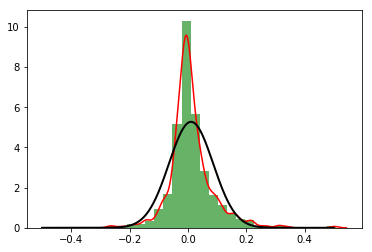

In [9]:
# normal fit
mu, std = norm.fit(rets)
print(mu, std)
xmin, xmax = -0.5, 0.5
x = np.linspace(xmin, xmax, 500)
p = norm.pdf(x, mu, std)


# kde fit
kde = sm.nonparametric.KDEUnivariate(rets)
kde.fit()
ret_value = kde.support
pdf = kde.density
prob = pdf*(ret_value[-1]-ret_value[0])/(len(pdf)-1)
prob[prob < 0] = 0

# plot
plt.hist(rets, bins=25, normed=True, alpha=0.6, color='g')
plt.plot(ret_value, pdf, 'r')
plt.plot(x, p, 'k', linewidth=2)

## With the sum

In [56]:
N_days = 30
sample_n = 100000
sample = np.zeros(sample_n)#np.random.choice(ret_value, p=prob, size=100000)

for k in range(N_days):
    sample += np.random.choice(ret_value, p=prob, size=sample_n)

0.318595724101 0.419017863346


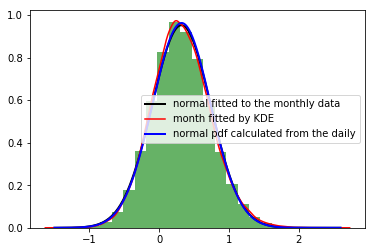

In [57]:
rets=sample

# normal fit
mu_2, std_2 = norm.fit(sample)
print(mu_2, std_2)
xmin, xmax = min(sample), max(sample)
x = np.linspace(xmin, xmax, 500)
p = norm.pdf(x, mu_2, std_2)
plt.plot(x, p, 'k', linewidth=2, label='normal fitted to the monthly data')

# kde fit
kde = sm.nonparametric.KDEUnivariate(rets)
kde.fit()
ret_value2 = kde.support
pdf2 = kde.density
prob2 = pdf*(ret_value2[-1]-ret_value2[0])/(len(pdf2)-1)
prob2[prob2 < 0] = 0

# plot
plt.hist(rets, bins=25, normed=True, alpha=0.6, color='g')
plt.plot(ret_value2, pdf2, 'r', label='month fitted by KDE')

P_month = norm.pdf(x, mu*N_days, std*np.sqrt(N_days))

plt.plot(x, P_month, 'b', linewidth=2, label='normal pdf calculated from the daily')
plt.legend()

# Conclusion
It is better to fit the daily returns to a normal and then calculate the monthly returns from it.